In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

FIGOUTDIR = '../output/figures/6_Preimplantation.EED_mKO_experiments.part9.Viability_assay_plot/'

In [3]:
! mkdir -p $FIGOUTDIR || true;

In [4]:
fn = '../../Viability_assay.tsv'
df = pd.read_table(fn).set_index('treatment')
df = df.T

In [5]:
df

treatment,Lap2b,Cbx7-Lap2b
zygote,1.000000,1.000000
2cell,0.830769,0.880597
8cell,0.707692,0.835821
morula,0.692308,0.746269
blastocyst,0.538462,0.522388


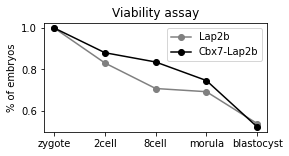

In [6]:
fig, ax = plt.subplots(figsize=(4,2))
for treatment in ['Lap2b', 'Cbx7-Lap2b']:
    c = {'Lap2b': 'grey', 'Cbx7-Lap2b': 'black'}[treatment]
    ax.plot(df[treatment], 'o-', label=treatment, color=c)
ax.set_ylabel('% of embryos')
ax.set_title('Viability assay')
ax.legend(loc='upper right')

outfn = FIGOUTDIR + 'viability_assay_plot.all_stages.pdf'
plt.savefig(outfn, bbox_inches='tight')

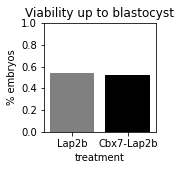

In [7]:
fig, ax = plt.subplots(figsize=(2,2))
tmp = df.T['blastocyst'].reset_index()
sns.barplot(
    x=tmp['treatment'], y=tmp['blastocyst'], hue=tmp['treatment'], dodge=False,
    ax=ax, palette={'Lap2b': 'grey', 'Cbx7-Lap2b': 'black'})
ax.set_ylim(0,1)
ax.set_ylabel('% embryos')
ax.set_title('Viability up to blastocyst')
outfn = FIGOUTDIR + 'viability_assay_plot.blastocyst.pdf'
plt.savefig(outfn, bbox_inches='tight')